# Construction of Yearly Time Series Data

In [22]:
%matplotlib inline

# filter warnings
import warnings
warnings.filterwarnings("ignore")

# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# set font scale and style
plt.rcParams.update({'font.size': 18})

# Load raw data

In [25]:
# load data
base_path = '/Users/sowerre/Documents/python/ml-projects/natural-disaster'
df =pd.read_csv(base_path + '/data/emdat_public_raw.csv')
df.columns = [c.lower() for c in df.columns] # column names in lower case
df.columns = [c.replace(' ', '_') for c in df.columns] # replace space with underscore
print("Data size:", df.shape) # print data size
cols = ['start_year', 'start_month', 'start_day', 'continent', 'disaster_type',
        'total_deaths', 'total_affected']
df[cols].head()

Data size: (16338, 49)


,start_year,start_month,start_day,continent,disaster_type,total_deaths,total_affected
0,1900,NaN,NaN,Africa,Drought,11000.0,NaN
1,1900,NaN,NaN,Asia,Drought,1250000.0,NaN
2,1902,4.0,18.0,Americas,Earthquake,2000.0,NaN
3,1902,4.0,8.0,Americas,Volcanic activity,1000.0,NaN
4,1902,10.0,24.0,Americas,Volcanic activity,6000.0,NaN


In [65]:
cols = ['start_year', 'continent', 'disaster_type']
cols_dict = {'year':'count'}
df2 = pd.DataFrame(df.groupby(cols).count()['year']).reset_index()
df2.rename(columns=cols_dict, inplace=True)
df2

,start_year,continent,disaster_type,count
0,1900,Africa,Drought,1
1,1900,Americas,Epidemic,1
2,1900,Americas,Flood,1
3,1900,Americas,Storm,1
4,1900,Asia,Drought,1
...,...,...,...,...
2355,2022,Europe,Storm,11
2356,2022,Oceania,Drought,1
2357,2022,Oceania,Flood,3
2358,2022,Oceania,Storm,1


In [67]:
df2.continent.value_counts()

Asia        674
Americas    615
Africa      395
Europe      394
Oceania     282
Name: continent, dtype: int64

In [68]:
df2.disaster_type.value_counts()

Storm                    413
Earthquake               372
Flood                    354
Drought                  230
Landslide                215
Epidemic                 201
Wildfire                 183
Volcanic activity        157
Extreme temperature      154
Mass movement (dry)       43
Insect infestation        34
Impact                     1
Animal accident            1
Glacial lake outburst      1
Fog                        1
Name: disaster_type, dtype: int64

<AxesSubplot:xlabel='start_year'>

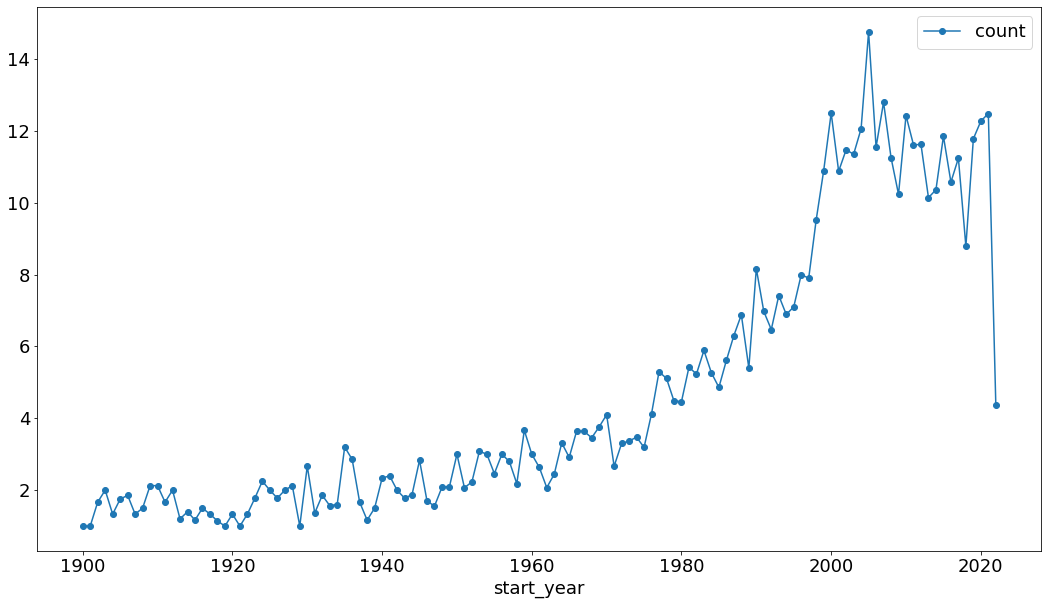

In [69]:
pvt = df2.pivot_table('count', index='start_year')
pvt.plot(marker='o', figsize=(18,10))

# Extract cyclic features

In [5]:
# Extract year, month, weekday
ts['date_created'] = pd.to_datetime(ts['date_created'])
ts['year'] = ts['date_created'].dt.year
ts['month'] = ts['date_created'].dt.month_name() 
ts['weekday'] = ts['date_created'].dt.day_name()

In [6]:
col = {'arXiv_id':'count'}
ts.rename(columns=col, inplace=True)
ts.index = ts.date_created
ts.drop(['date_created'], axis=1, inplace=True)

In [7]:
# change weekday to integer
wday_dict = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 
             'Friday':5,  'Saturday':6,   'Sunday':0
            }

# change weekday to weekend indicator
weekend_dict = {1:'false', 2:'false', 3:'false', 4:'false', 5:'false', 
                6:'true', 0:'true'}

# change month to integer
month_dict = {'January':1, 'February':2, 'March':3, 
              'April':4,  'May':5, 'June':6,  'July':7,  
              'August':8, 'September':9,'October':10, 
              'November':11, 'December':12
             }

# change month to season
sea_dict = {1:'winter', 2:'winter', 3:'spring', 
              4:'spring',  5:'spring', 6:'summer', 
            7:'summer',  8:'summer', 9:'fall',
            10:'fall', 11:'fall', 12:'winter'
             }

ts['weekday'].replace(wday_dict, inplace = True)
ts['month'].replace(month_dict, inplace = True)
ts['season'] = ts['month'].replace(sea_dict)
ts['weekend'] = ts['weekday'].replace(weekend_dict)

In [8]:
start_date, end_date = '2010-01-01', '2014-12-31'
cols = ['categories', 'year', 'month', 'weekday',
        'season', 'weekend', 'count']
ts = ts[cols][start_date:end_date]
ts

,categories,year,month,weekday,season,weekend,count
date_created,,,,,,,
2010-01-01,astro-ph,2010,1,5,winter,false,1
2010-01-01,cond-mat,2010,1,5,winter,false,4
2010-01-01,gr-qc,2010,1,5,winter,false,1
2010-01-01,hep-th,2010,1,5,winter,false,5
2010-01-02,astro-ph,2010,1,6,winter,true,4
...,...,...,...,...,...,...,...
2014-12-29,hep-th,2014,12,1,winter,false,6
2014-12-30,astro-ph,2014,12,2,winter,false,8
2014-12-30,cond-mat,2014,12,2,winter,false,5


In [9]:
# save data as csv
ts.to_csv('../data/daily_ts_data.csv', index = True)